In [2]:
import pandas as pd
import talib
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

In [4]:
def get_data(ticker, start, end):
    data = yf.download(ticker, start, end)
    data['Ticker'] = ticker
    data = data.reset_index()
    data['Date'] = pd.to_datetime(data['Date'])
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data = data.reindex(columns=['Ticker', 'Date', 'Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Close', 'Volume'])
    return data

In [5]:
data = get_data('AAPL', '2015-01-01', '2024-05-01')

[*********************100%***********************]  1 of 1 completed


In [17]:
data.head()

,Ticker,Date,Year,Month,Day,Open,High,Low,Close,Volume
0,AAPL,2014-12-31,2014,12,31,28.205000,28.282499,27.552500,27.594999,165613600
1,AAPL,2015-01-02,2015,1,2,27.847500,27.860001,26.837500,27.332500,212818400
2,AAPL,2015-01-05,2015,1,5,27.072500,27.162500,26.352501,26.562500,257142000
3,AAPL,2015-01-06,2015,1,6,26.635000,26.857500,26.157499,26.565001,263188400
4,AAPL,2015-01-07,2015,1,7,26.799999,27.049999,26.674999,26.937500,160423600


In [97]:
# version 1
choosen_day = 10
monthly_amount = 500
filtered_data = data
filtered_data['shares'] = 0
filtered_data.loc[filtered_data['Day'] == choosen_day, 'shares'] = monthly_amount // (filtered_data.loc[filtered_data['Day'] == choosen_day, 'Close'])
filtered_data['cost'] = filtered_data['shares'] * filtered_data['Close']
filtered_data['cumulative_shares'] = filtered_data['shares'].cumsum()
filtered_data['amount'] = filtered_data['cumulative_shares'] * filtered_data['Close']
filtered_data['cumulative_cost'] = filtered_data['cost'].cumsum()
filtered_data['return'] = filtered_data['amount'] - filtered_data['cumulative_cost']
filtered_data['return_percent'] = filtered_data['return'] / filtered_data['cumulative_cost'] * 100

In [99]:
filtered_data.set_index('Date', inplace=True)

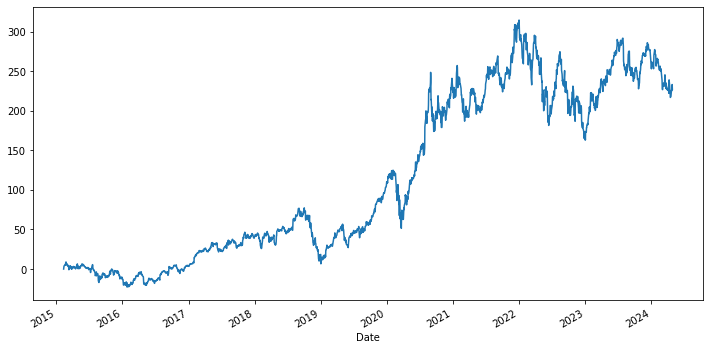

In [106]:
plt.figure(figsize=(12, 6))
filtered_data['return_percent'].plot()
# plt.xticks(ticks=range(0, len(filtered_data), 50), rotation=45)
plt.show()

In [7]:
# version 2
choosen_day = 10
monthly_amount = 500
filtered_data = data[data['Day'] == choosen_day].copy()
filtered_data['shares'] = monthly_amount // filtered_data['Close']
filtered_data['cost'] = filtered_data['shares'] * filtered_data['Close']
filtered_data['cumulative_shares'] = filtered_data['shares'].cumsum()
filtered_data['amount'] = filtered_data['cumulative_shares'] * filtered_data['Close']
filtered_data['cumulative_cost'] = filtered_data['cost'].cumsum()
filtered_data['return'] = filtered_data['amount'] - filtered_data['cumulative_cost']
filtered_data['return_percent'] = filtered_data['return'] / filtered_data['cumulative_cost'] * 100
filtered_data.set_index('Date', inplace=True)

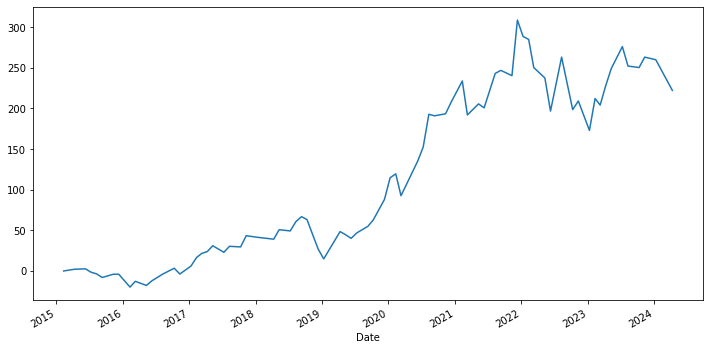

In [8]:
plt.figure(figsize=(12, 6))
filtered_data['return_percent'].plot()
# plt.xticks(ticks=range(0, len(filtered_data), 50), rotation=45)
plt.show()